In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Предварительныя обработка

*Подгружаем готовые данные*

In [3]:
df = pd.read_csv('/content/Housing.csv')
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


* `price` цена домов (целевой признак)
* `area`  площадь дома в кв. м.
* `bedrooms`  количество спален
* `bathrooms`  количество ванных комнат
* `stories`  количество этажей
* `mainroad`  есть ли поблизости главная дорога
* `guestroom`  оценка благоприятности погоды от 1 (чистый, ясный день) до 4 (ливень, туман)
* `basement`  наличие подвала
* `hotwaterheating`  наличие системы горячего водоснабжения
* `airconditioning`  наличие кондиционера
* `parking`  количество парковочных мест
* `prefarea`  указывает, расположен ли дом в предпочтительном районе
* `furnishingstatus`  указывает наличие мебели (с мебелью/частично с мебелью/без мебели)

*Выводим количество пропущенных значений в каждом столбце DataFrame df в порядке убывания. Затем подсчитываем количество дубликатов строк в DataFrame*

In [5]:
df.isna().sum().sort_values(ascending=False)

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [6]:
df.duplicated().sum()

0

*Преобразоваем значения в столбце "price" в миллионы единиц для удобства чтения и анализа, а затем вызываем метод describe() для получения описательной статистики нового состояния DataFrame*

In [8]:
df['price'] = df['price'] / (10 ** 6) # Для удобства переведем в млн. ед.
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000
mean,0.000005,5150.541284,2.965138,1.286239,1.805505,0.693578
std,0.000002,2170.141023,0.738064,0.502470,0.867492,0.861586
min,0.000002,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000003,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,0.000004,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,0.000006,6360.000000,3.000000,2.000000,2.000000,1.000000
max,0.000013,16200.000000,6.000000,4.000000,4.000000,3.000000


*Получаем описательную статистику, такую как количество уникальных значений, наиболее часто встречающееся значение и количество его вхождений*

In [9]:
df.describe(include='object')

,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea,furnishingstatus
count,545,545,545,545,545,545,545
unique,2,2,2,2,2,2,3
top,yes,no,no,no,no,no,semi-furnished
freq,468,448,354,520,373,417,227


*По описательной статистике видно, что по целевому признаку и площади дома есть выбросы*

 **Вывод:** В данных не обнаружено пропусков и дубликатов, а также все столбцы соответствуют типам данных.

# Визуализация

*Посмотрим гистограмму количества продаваемых квартир в зависимости от их стоимости*

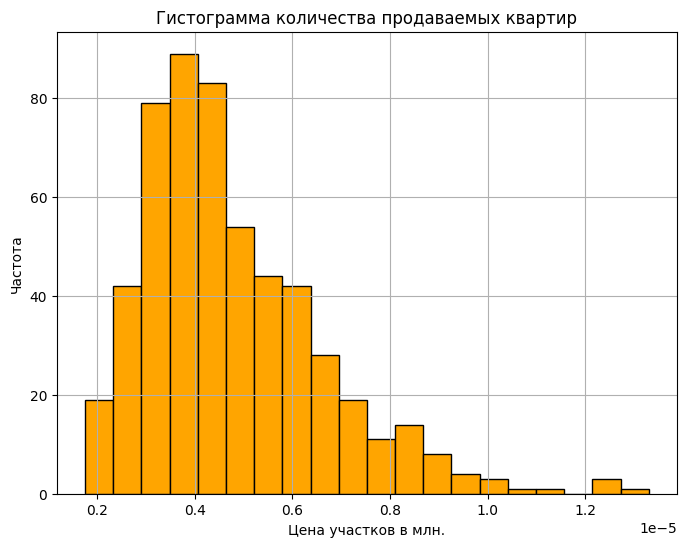

In [16]:
plt.figure(figsize=(8, 6))
plt.hist(df['price'], bins=20, color='orange', edgecolor='black')
plt.title('Гистограмма количества продаваемых квартир')
plt.xlabel('Цена участков в млн.')
plt.ylabel('Частота')
plt.grid(True)
plt.show()

**Вывод:** Распределение цены смещено влево и имеет хвост

*Далее посмотрим, как переменные коррелируют с целевой переменной с помощью матрицы облаков рассеивания*

<Figure size 1200x1000 with 0 Axes>

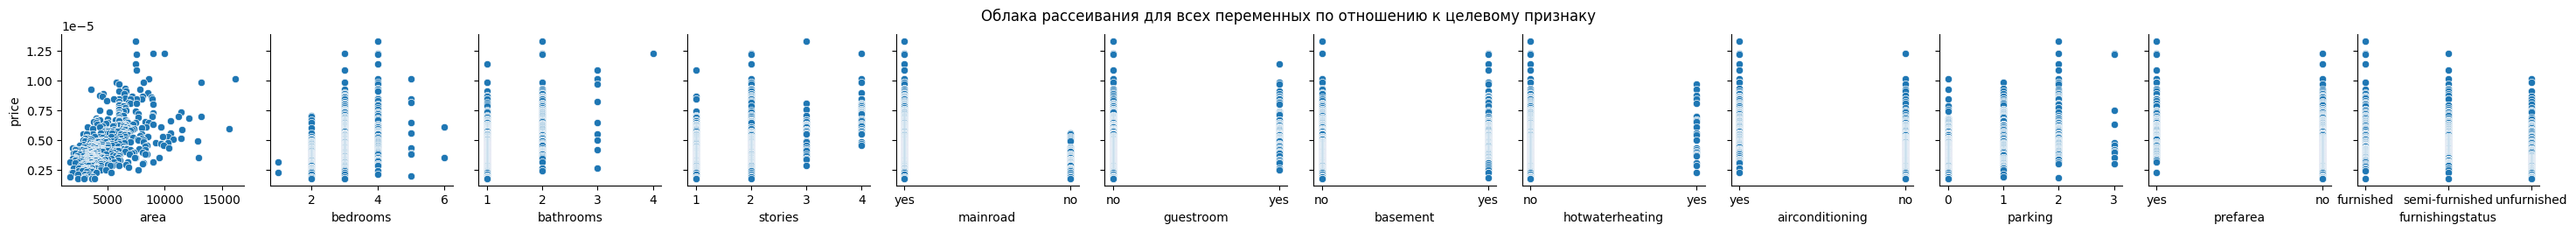

In [17]:
plt.figure(figsize=(12, 10))
sns.pairplot(df, y_vars=['price'], x_vars=df.columns.drop('price'), kind='scatter', diag_kind=None)
plt.suptitle('Облака рассеивания для всех переменных по отношению к целевому признаку', y=1.02)
plt.show()

**Исходя из представленных графиков можно сформировать гипотезы:**

**1)** Площадь дома влияет на стоимость (предполагается, что более крупные дома будут иметь более высокую стоимость);

**2)** Влияние предпочтительного района на стоимость (предполагается, что дома, расположенные в предпочтительном районе могут иметь более высокую стоимость);

**3)** Влияние количества спален на стоимость (предполагается, что чем больше количество комнат, тем выше стоимость дома)


*Далее посмотрим распределение площадей домов*

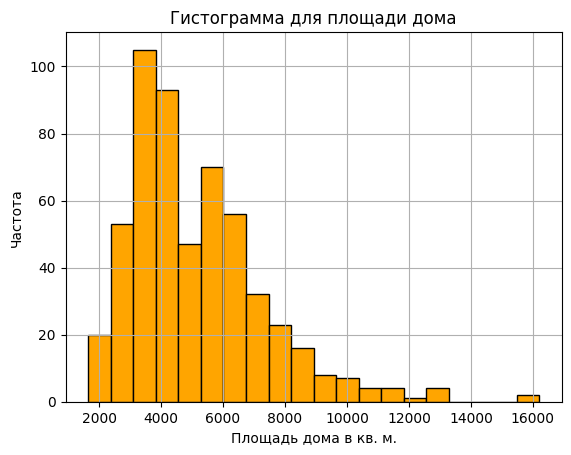

In [20]:
plt.hist(df['area'], bins=20, color='orange', edgecolor='black')
plt.title(f'Гистограмма для площади дома')
plt.xlabel('Площадь дома в кв. м.')
plt.ylabel('Частота')
plt.grid(True)
plt.show()

**Вывод:** По графику видно, что распределение смещено влево и присутствуют выбросы

*Создаем сетку графиков для визуализации распределения значений различных категориальных переменных*

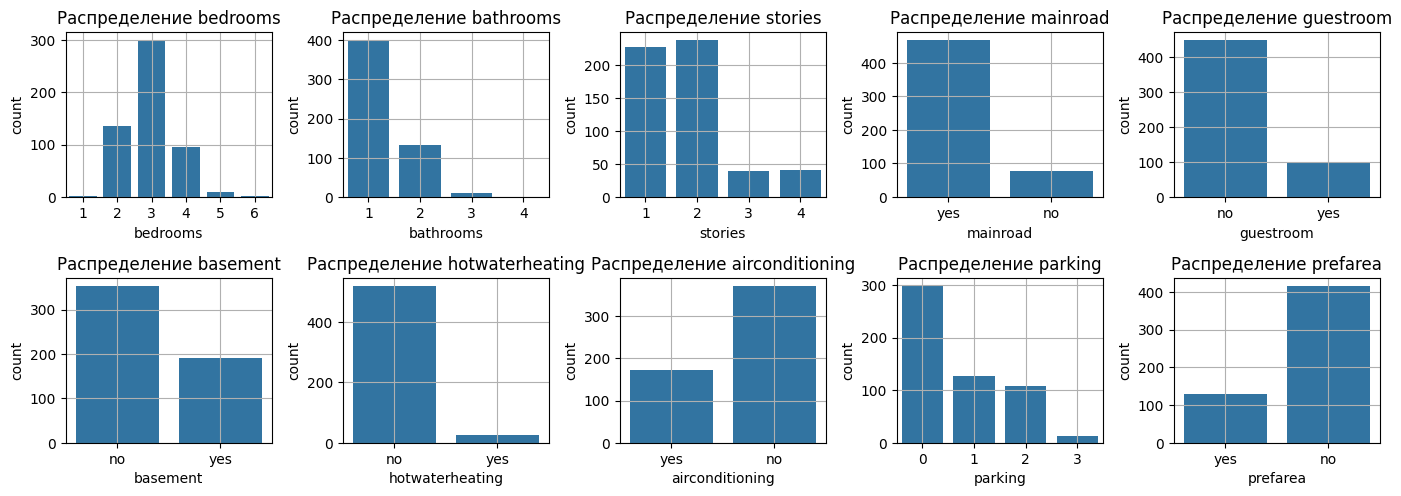

In [21]:
plt.figure(figsize=(14, 12))
for i, var in enumerate(df.columns.drop(['price', 'area', 'furnishingstatus'])):
    plt.subplot(5, 5, i+1)
    sns.countplot(x=var, data=df)
    plt.title(f'Распределение {var}')
    plt.grid()

plt.tight_layout()
plt.show()

*Создаем диаграмму с распределением домов по наличию или отсутствию мебели*

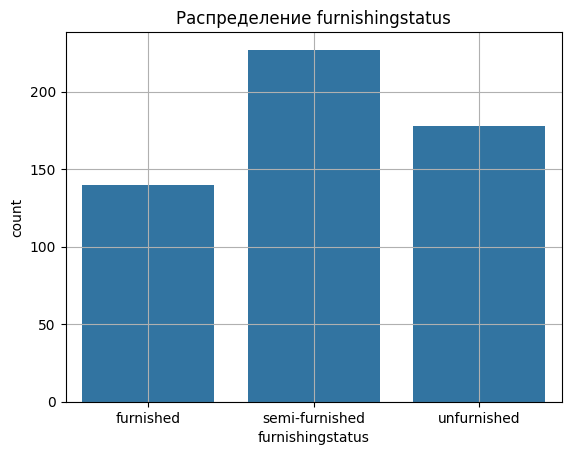

In [22]:
sns.countplot(x='furnishingstatus', data=df)
plt.title(f'Распределение furnishingstatus')
plt.grid()